# Project 2: Clustering + SVM to Predict Online Purchases
# DAV 6150

- Name: Zhengnan Li
- Repository: [Project_2/Z_Li_Project2.ipynb](https://github.com/Zhengnan817/DAV-6150/blob/5b0700d14267b43c664aca6d699e92ac88a638bc/Project_2/Z_Li_Project2.ipynb)

This is the library we are going to use for the whole project.

In [483]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler  # noqa: E402
from sklearn.cluster import KMeans  # noqa: E402
from scipy.cluster import hierarchy  # noqa: E402
from sklearn.metrics import silhouette_score  # noqa: E402

# 1. Introduction
For this Project, I will be working with a data set comprised of a variety of such web site metrics. My objective for Project 2 is to use clustering algorithms to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings, and then, after completing the necessary EDA and data prep work, construct an SVM model to predict the most likely categorization of any previously unseen data items. And as the data science practitioner, I will determine which features to include in my SVM models.  
In short, we will use the dataset to help the online retailers to try to determine whether or not a given site visitor will actually make a 
purchase.

### 1.1 Approach:

- 1. [Introduction](#1-Introduction): Import the data set and introduce data variables.  
- 2. [Pre-Clustering EDA](#2-Pre-Clustering-EDA): Explore the raw dataset and do analysis based on domain knowledge.  
- 3. [Pre-Clustering Data Preparation](#3-Pre-Clustering-Data-Preparation): Perform data cleaning, imputation and transformation.  
- 4. [Cluster Modeling](#4-Cluster-Modeling): Explain and present hierarchical and K-means clustering work.
- 5. [Post-Clustering Exploratory Data Analysis ](#5-Post-Clustering-Exploratory-Data-Analysis):Explain and present the post-clustering EDA work.
- 6. [Clustering Output vs. Actual Labels](#6-Clustering-Output-vs.-Actual-Labels): Compare the content of V_Revenue to the content of the Revenue column generated by clustering algorithm.
- 7. [SVM Modeling](#7-SVM-Modeling): SVM modeling work including any feature selection methods used and the use of any kernel functions.  
- 8. [Select Models](#8-Select-Models): Explain how I selected your model selection criteria and why. Also use the test dataset to predict.
- 9. [Clustering + SVM Output vs. Actual Labels](#9-Clustering-+-SVM-Output-vs.-Actual-Labels): Compare the content of V_Revenue to the 
content of the Revenue column generated by SVM algorithm.
- 10. [Conclusion](#10-Conclusion)

### 1.2 Data Introduction

 The data is sourced from the UCI Machine Learning repository:https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset. It is comprised of a variety of such web site metrics. After importing the dataset into the file, we can see that it has 12330 rows and 17 columns.


In [484]:
online_shop = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Project_2/src/Project2_Data.csv")
online_shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [485]:
online_shop.shape

(12330, 17)

# 2. Pre Clustering EDA

In this part, we will explore the dataset's main features through various statistical charts and summary statistics involves understanding the relationships between data elements, as well as identifying potential patterns, anomalies, and trends within the data itself to gain an intuitive understanding of data, including its distribution and skewness, is the essence of exploratory data analysis (EDA). This crucial step enables us to identify anomalies or errors within the data, providing a solid foundation for subsequent data cleaning processes.

## 2.1 Statistical Summary

First, let's overview the basic statistical summary of the data set.We can see that the data set has no null and missing values. And the datatype includes int64, float64, object and bool. Also there are some duplicated values. We will analyze it in the visualization part to divide them into numerical and categorical variables.

In [486]:
online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [487]:
# Check the unique value for each column
online_shop.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

In [488]:
duplicates = online_shop.duplicated(keep='first')
print({duplicates.sum()} )

{125}


In [489]:
# Basic statisical insight
online_shop.describe() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 2.2 Data Visualization

Before starting, we define the functions to be used for EDA.

In [490]:
def bar(df, columns):
    num_cols = len(columns)
    fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6), sharey=True)
    for i, column in enumerate(columns):
        value_counts = df[column].value_counts(sort=False)
        axs[i].bar(value_counts.index.astype(str), value_counts.values)
        axs[i].set_title(f'Bar Plot of {column}')
        axs[i].set_xlabel(column)
        axs[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()



def box(df, columns):
        num_cols = len(columns)
        fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
        for i, column in enumerate(columns):
            sns.boxplot(data=df, x=column, ax=axs[i])
            axs[i].set_title(f'Box Plot of {column}')
        plt.tight_layout()
        plt.show()

def hist(df, columns):
        num_cols = len(columns)
        fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
        for i, column in enumerate(columns):
            axs[i].hist(df[column], bins=20)
            axs[i].set_title(f'Histogram of {column}')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

def scatter(df, column_pairs):
        num_pairs = len(column_pairs)
        fig, axs = plt.subplots(1, num_pairs, figsize=(5 * num_pairs, 6))
        if num_pairs == 1:
            axs = [axs]  # Ensure axs is iterable
        for i, (column_x, column_y) in enumerate(column_pairs):
            axs[i].scatter(df[column_x], df[column_y])
            axs[i].set_title(f'Scatter Plot of {column_x} vs. {column_y}')
            axs[i].set_xlabel(column_x)
            axs[i].set_ylabel(column_y)
        plt.tight_layout()
        plt.show()

Next, based on the content of the dataset and the attributes of each column, we divide the dataset into categorical variables and numerical variables.

In [491]:
online_shop_num = online_shop[['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues' ]]
online_shop_cate =online_shop[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 
                       'TrafficType', 'VisitorType', 'Weekend']]

### 2.2.1 Numerical Variables

The analysis of numerical variables is primarily divided into visitor behavior analysis and page performance analysis. From the histogram and box plots, we can observe that most of the attributes have many outliers and do not follow a normal distribution. For features that do not follow a normal distribution, we can use a log transformation or other method to reduce skew and normalize the data.

| Variables                 | Definition                             | Data Type    | Distribution |  Explanation                                                                                                    |
|---------------------------|----------------------------------------|--------------|--------------|----------------------------------------------------------------------------------------------------------------|
| Administrative            | Number of administrative pages visited | Numerical    | Varied       |  Reflects the engagement level in administrative activities on the website                                     |
| Administrative_Duration   | Time spent on administrative pages     | Numerical    | Varied       |  Indicates the depth of engagement in administrative sections                                                   |
| Informational             | Number of informational pages visited  | Numerical    | Varied       |  Measures interest in informational content of the website                                                      |
| Informational_Duration    | Time spent on informational pages      | Numerical    | Varied       |  Reflects the depth of interest in informational content                                                        |
| ProductRelated            | Number of product-related pages visited| Numerical    | Varied       |  Indicates the level of interest in products                                                                    |
| ProductRelated_Duration   | Time spent on product-related pages    | Numerical    | Varied       | Shows the engagement level with product-related content                                                        |
| BounceRates               | Bounce rates of a web page             | Numerical    | Varied       |  Percentage of visitors who navigate away from the site after viewing only one page                             |
| ExitRates                 | Exit rates of a web page               | Numerical    | Varied       |  Percentage of all views on the site that a specific page was the last in the session                           |
| PageValues                | Page values of a web page              | Numerical    | Varied       |  Average value for a page that a user visited before completing an e-commerce transaction                       |

- #### Visitor behavior analysis

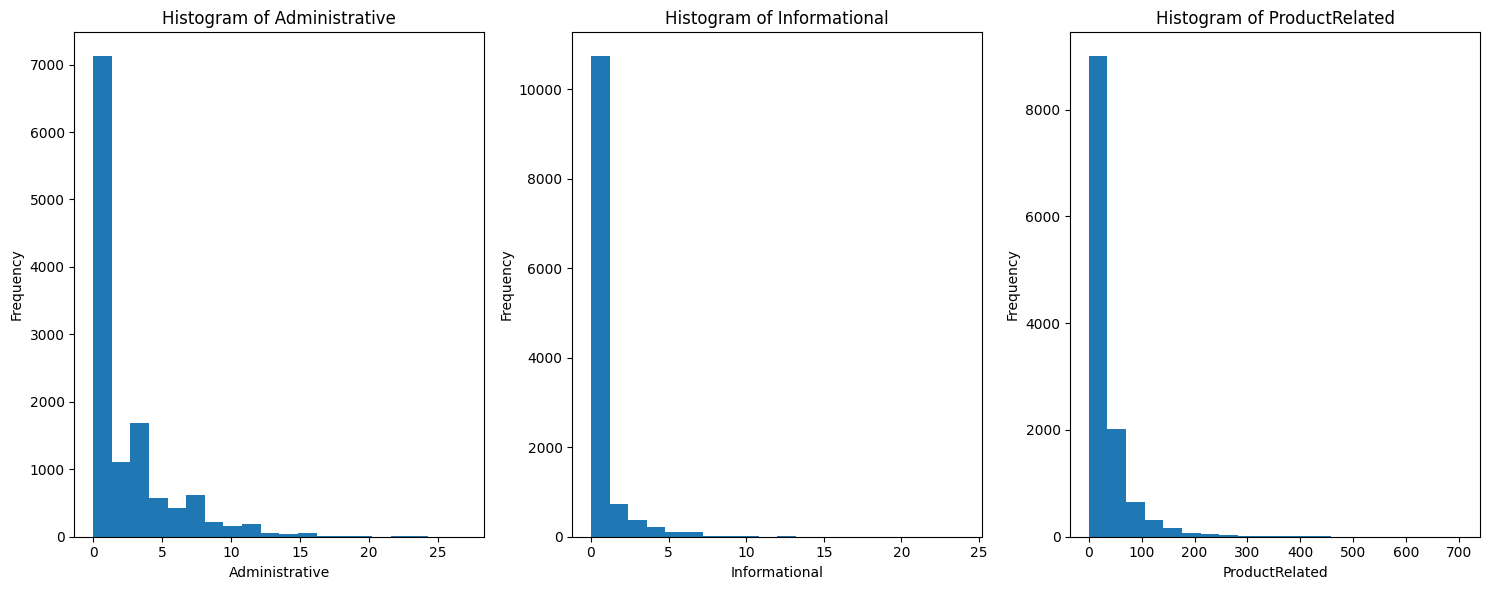

In [492]:
hist(online_shop,['Administrative','Informational', 'ProductRelated'])

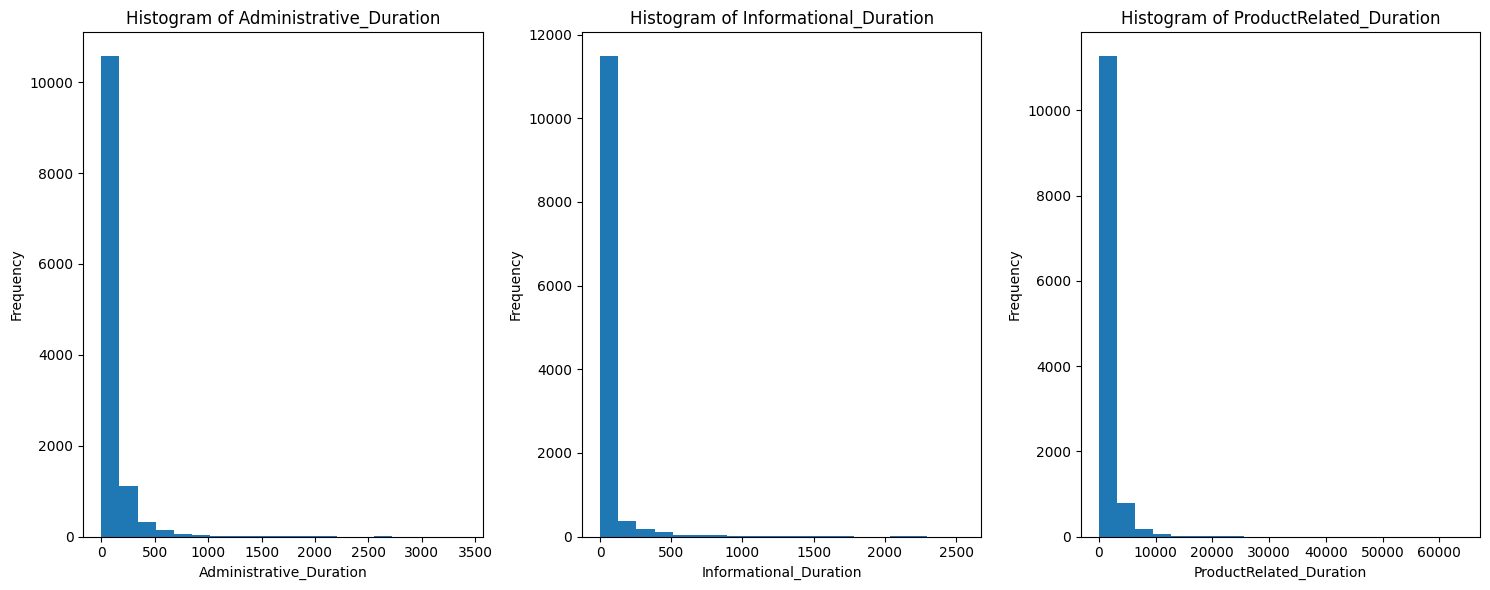

In [493]:
hist(online_shop,['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',])

- #### Page performance analysis

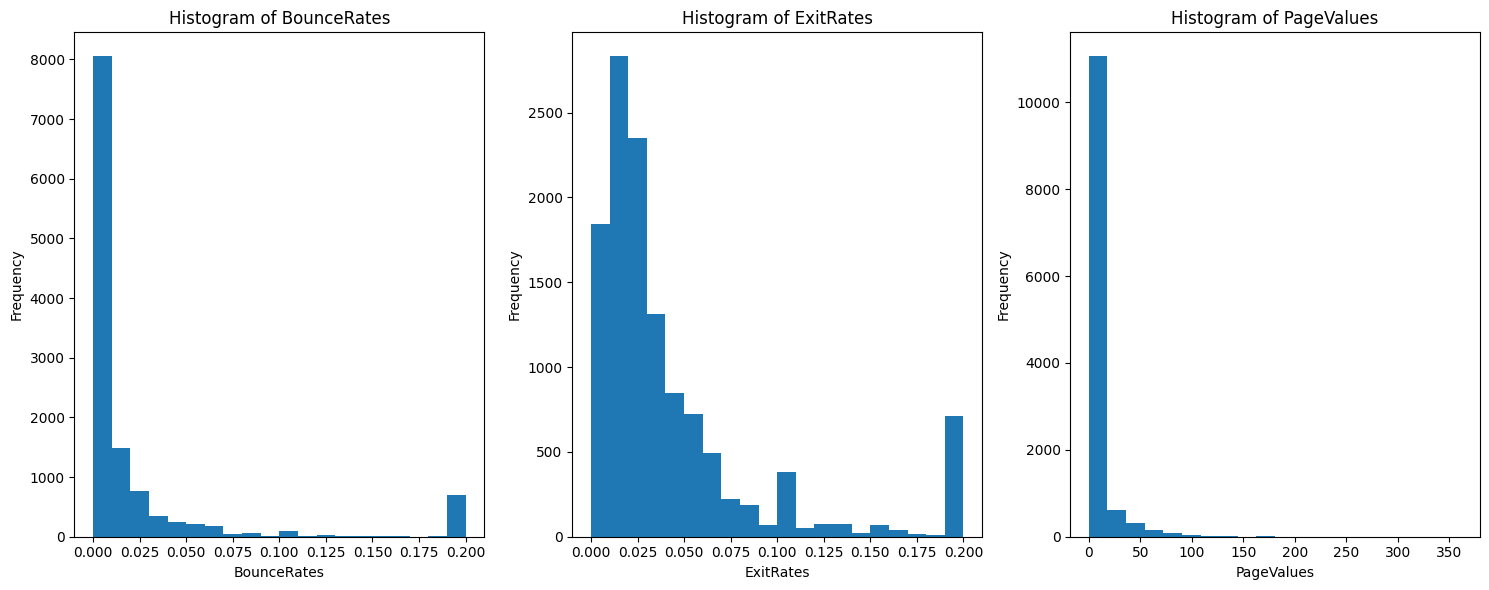

In [494]:
hist(online_shop,['BounceRates', 'ExitRates', 'PageValues'])

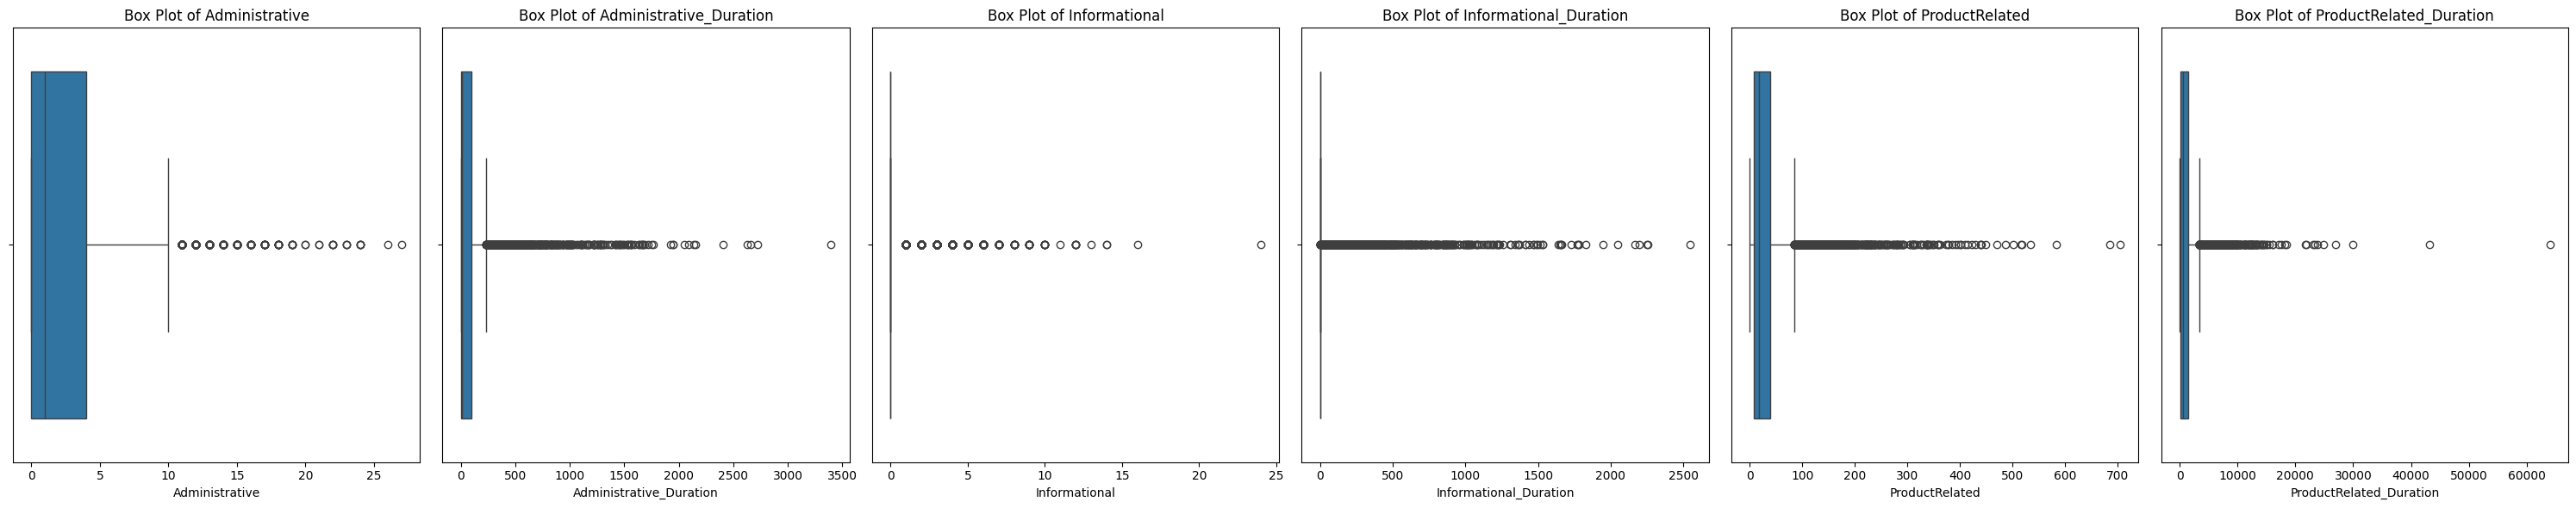

In [495]:
box(online_shop,['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',])

### Categorical Variables

| Variables                 | Definition                             | Data Type    | Distribution |  Explanation                                                                                                    |
|---------------------------|----------------------------------------|--------------|--------------|----------------------------------------------------------------------------------------------------------------|
| SpecialDay                | Closeness to a special day             | Categorical  | Varied       |  Indicates the closeness of the site visit time to a specific special day (e.g., Mother's Day, Valentine's Day) |
| Month                     | Month of the visit                     | Categorical  | Varied       |  The month of the year when the page was visited                                                                |
| OperatingSystems          | Operating system used                  | Categorical  | Varied       |  The operating system of the visiting user's device                                                             |
| Browser                   | Browser used                           | Categorical  | Varied       | The browser used by the visitor to access the website                                                          |
| Region                    | Visitor's region                       | Categorical  | Varied       |  The geographical region of the visitor                                                                         |
| TrafficType               | Type of traffic                        | Categorical  | Varied       |  The type of traffic source (e.g., direct, referral, social)                                                     |
| VisitorType               | Type of visitor                        | Categorical  | Varied       |  Whether the visitor is New or Returning                                                                        |
| Weekend                   | Weekend visit                          | Boolean      | Varied       |  Indicates whether the visit occurred on a weekend                                                              |

- #### Visitor characteristics analysis

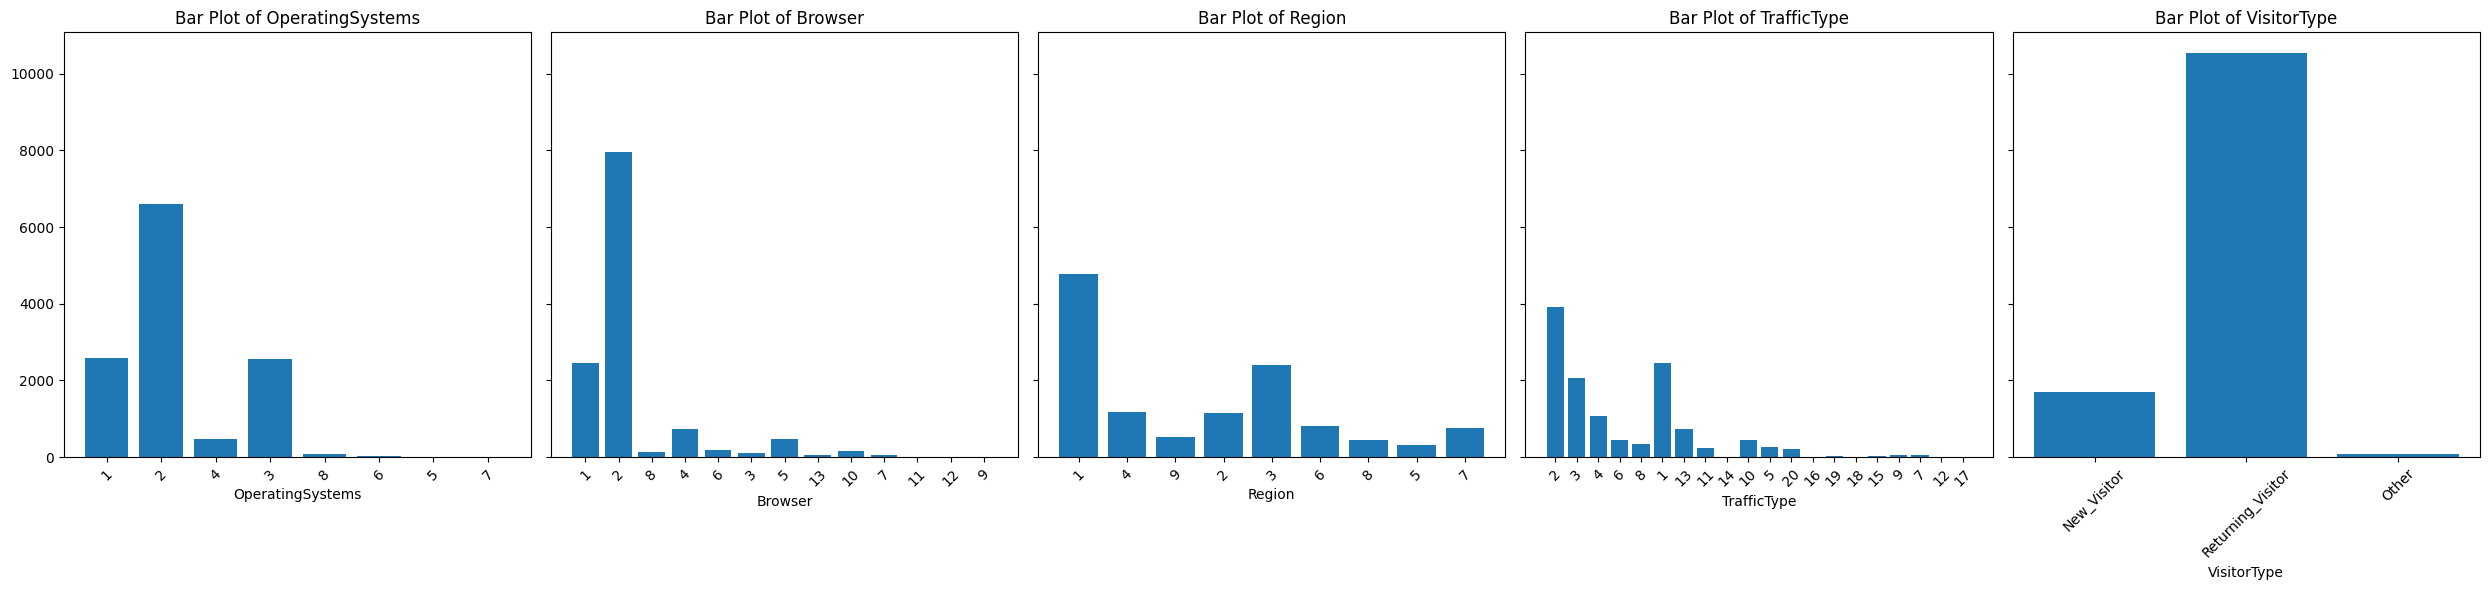

In [496]:
bar(online_shop,['OperatingSystems', 'Browser', 'Region', 
                       'TrafficType', 'VisitorType'])

- #### Time analysis

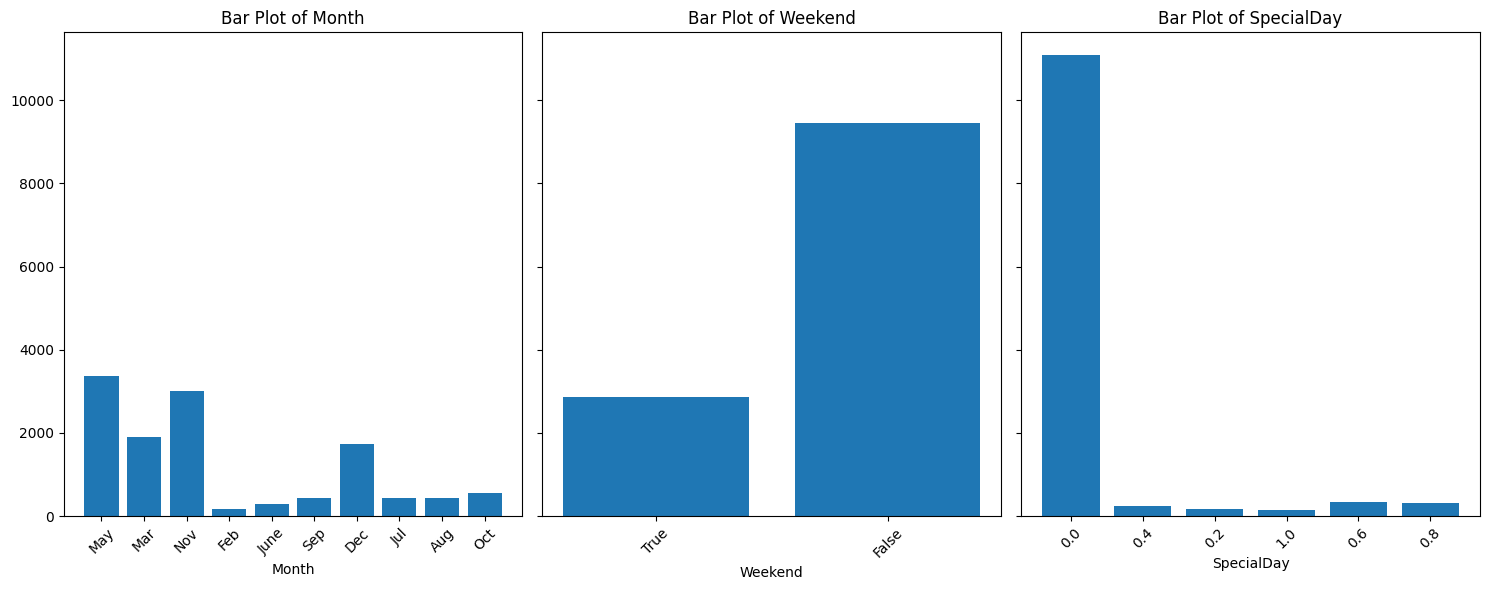

In [497]:
bar(online_shop,['Month','Weekend','SpecialDay'])

### Correlation Analysis

We use the numerical data and some categorical data to show the correlation except 'Month' and 'Visitortype' because they need further processing. We will analyze it in the future analysis.

In [498]:
online_shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,True
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,May,2,6,3,6,Returning_Visitor,True


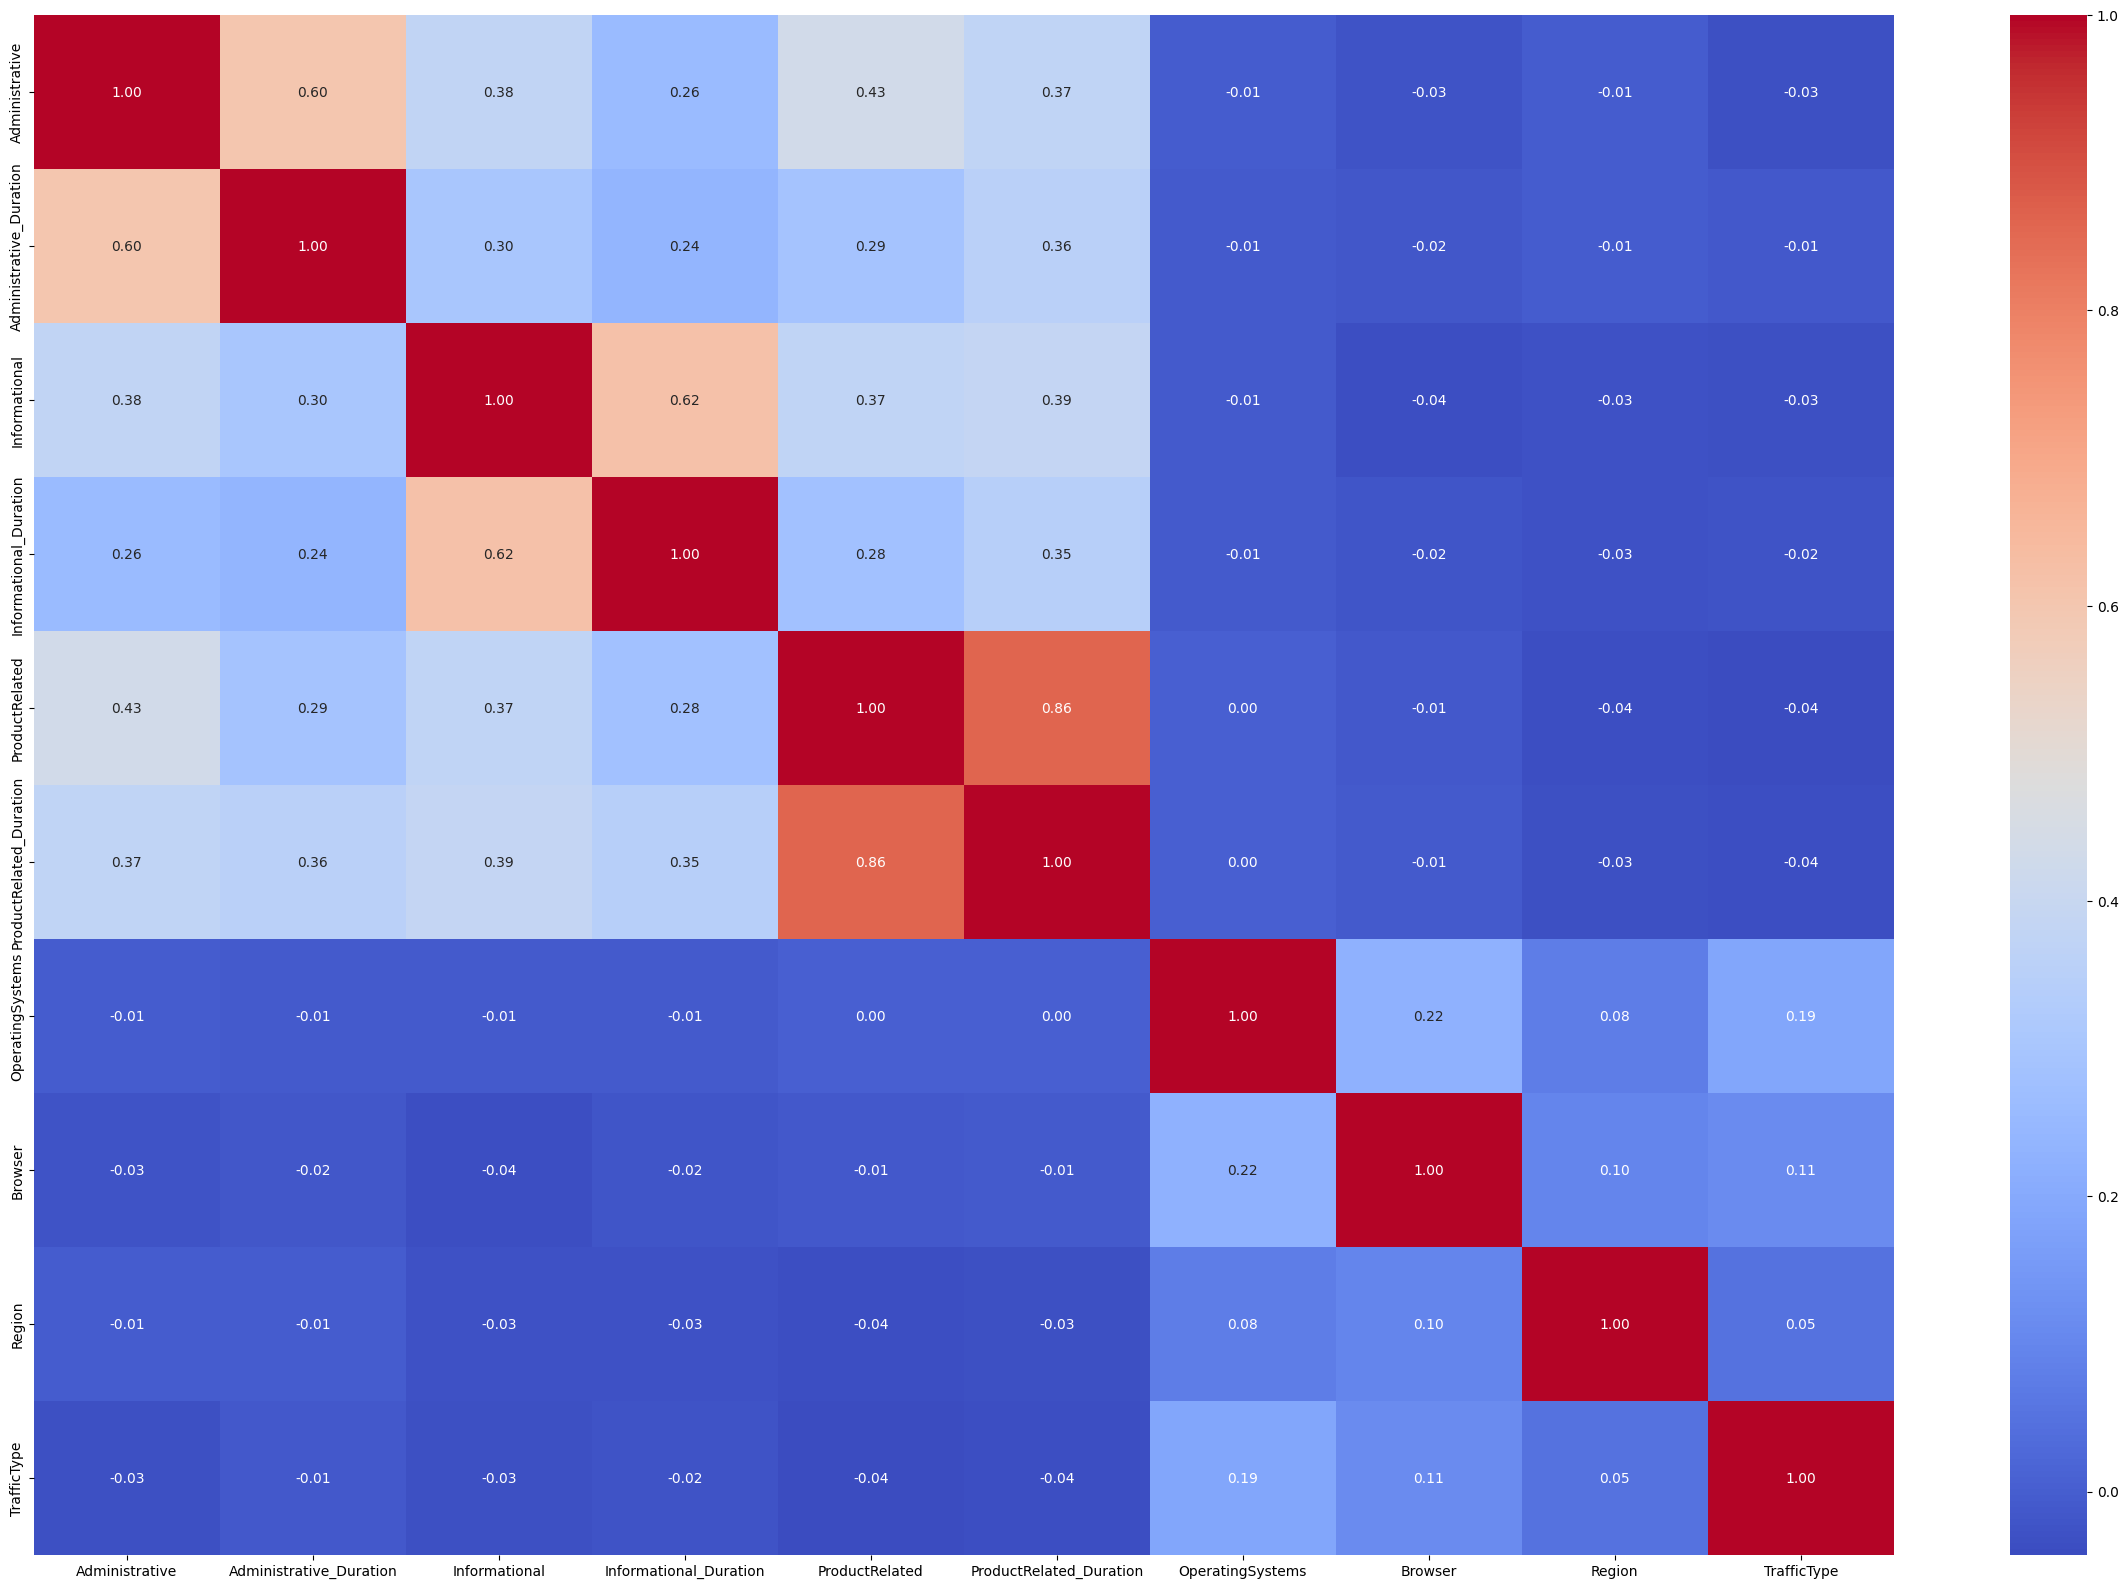

In [499]:
corr = online_shop[['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','OperatingSystems', 'Browser', 'Region', 'TrafficType']].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 3. Pre-Clustering Data Preparation

In this part, we will prepare the numerical and categorical data for the model based on the EDA part.

## 3.1 Data cleaning

#### Duplicates
There are 125 duplicate values in EDA part. Because the dataset the data set records various activities and behavioral characteristics of visitors on the website. There are as many as 17 dimensions that describe visitor behavior. Therefore, the probability of visitors having exactly the same behavior is extremely small. We believe that duplicate rows are data collection or recording anomalies and need to be dropped.

In [500]:
duplicates = online_shop.duplicated(keep='first')
print({duplicates.sum()} )

online_shop_unique = online_shop.drop_duplicates()

{125}


#### Missing values
Using visualization method to check values. We can see there are no missing values for the whole data set.

Administrative             0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
VisitorType                0
PageValues                 0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Administrative_Duration    0
ExitRates                  0
Weekend                    0
dtype: int64

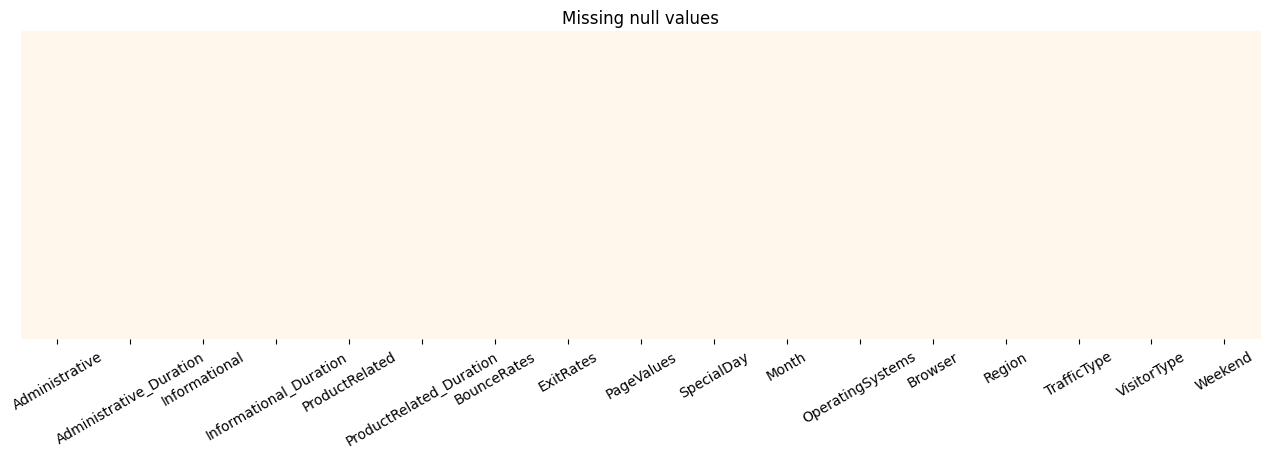

In [501]:
plt.rcParams["figure.figsize"] = (16, 4)
sns.heatmap(online_shop_unique.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
plt.xticks(rotation=30)
online_shop_unique.isnull().sum().sort_values()

## 3.2 Data transformation

#### Numerical data
According to the EDA part, we can see that the distribution of numerical variables is skewed and there are many outliers, and the subsequent use of the cluster model is more sensitive to data anomalies, so we decided to use Robust scaling for data processing. This method will not ingore the outliers because it should be considered.

In [502]:
columns_to_scale = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

#Initialize RobustScaler
scaler = RobustScaler()

#Apply Robust Scaling to the specified columns
df_scaled = online_shop_num.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(online_shop_num[columns_to_scale])

df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.25,-0.080424,0.0,0.0,-0.322581,-0.294477,-0.185128,0.095621,53.474571
1,-0.25,-0.080424,0.0,0.0,-0.129032,0.342622,0.664577,0.628954,0.000000
2,0.75,0.321694,2.0,82.0,-0.451613,-0.392425,-0.185128,-0.214379,0.000000
3,0.75,1.160244,0.0,0.0,-0.064516,0.044098,-0.185128,-0.367342,0.000000
4,0.00,0.562965,1.0,15.0,0.258065,0.055647,-0.185128,-0.596687,0.000000


#### Categorical data

- Month

In [503]:
online_shop_cate.Month.replace({'May':'5',
 'Nov':'11',
 'Mar':'3',
 'Dec':'12',
 'Oct':'10',
 'Sep':'9',
 'Aug':'8',
 'Jul':'7',
 'June':'6',       
 'Feb':'2'}, inplace = True)

- VisitorType

In [504]:
online_shop_cate.VisitorType.replace({'Returning_Visitor': '1','New_Visitor':'2','Other':'0'},inplace = True)

- OperatingSystems

In [505]:
online_shop_cate['OperatingSystems'] = online_shop_cate['OperatingSystems'].apply(lambda x: '2' if x == 2 else 'other')

- TrifficType

In [506]:
online_shop_cate['TrafficType'] = online_shop_cate['TrafficType'].apply(lambda x: '2' if x == 2 else ('1' if x ==1 else ('3' if x ==3 else ('4'if x==4 else 'other'))))

- Browser

In [507]:
online_shop_cate['Browser'] = online_shop_cate['Browser'].apply(lambda x: '2' if x == 2 else 'other')

- Region

In [508]:
online_shop_cate['Region'] = online_shop_cate['Region'].apply(lambda x: '1' if x == 1 else ('3' if x ==3 else ('4' if x ==4 else ('2'if x==2 else 'other'))))

In [509]:
online_shop_cate = pd.get_dummies(online_shop_cate, columns=['Month','OperatingSystems','Browser','Region','TrafficType', 'VisitorType','SpecialDay'])

In [510]:
online_shop_cate

,Weekend,Month_10,Month_11,Month_12,Month_2,Month_3,Month_5,Month_6,Month_7,Month_8,...,TrafficType_other,VisitorType_0,VisitorType_1,VisitorType_2,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
12326,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False
12328,True,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [511]:
online_shop_cate.dtypes

Weekend                   bool
Month_10                  bool
Month_11                  bool
Month_12                  bool
Month_2                   bool
Month_3                   bool
Month_5                   bool
Month_6                   bool
Month_7                   bool
Month_8                   bool
Month_9                   bool
OperatingSystems_2        bool
OperatingSystems_other    bool
Browser_2                 bool
Browser_other             bool
Region_1                  bool
Region_2                  bool
Region_3                  bool
Region_4                  bool
Region_other              bool
TrafficType_1             bool
TrafficType_2             bool
TrafficType_3             bool
TrafficType_4             bool
TrafficType_other         bool
VisitorType_0             bool
VisitorType_1             bool
VisitorType_2             bool
SpecialDay_0.0            bool
SpecialDay_0.2            bool
SpecialDay_0.4            bool
SpecialDay_0.6            bool
SpecialD

In [512]:
online_shop = pd.concat([online_shop_num, online_shop_cate],axis=1)
online_shop.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,TrafficType_other,VisitorType_0,VisitorType_1,VisitorType_2,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,True,...,False,False,False,True,True,False,False,False,False,False
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,False,...,False,False,True,False,True,False,False,False,False,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,False,...,False,False,False,True,True,False,False,False,False,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,False,...,False,False,True,False,True,False,False,False,False,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,False,...,False,False,True,False,True,False,False,False,False,False


In [518]:
online_shop.shape

(12330, 43)

# 4. Cluster Modeling

## 4.1 Hierarchical clustering

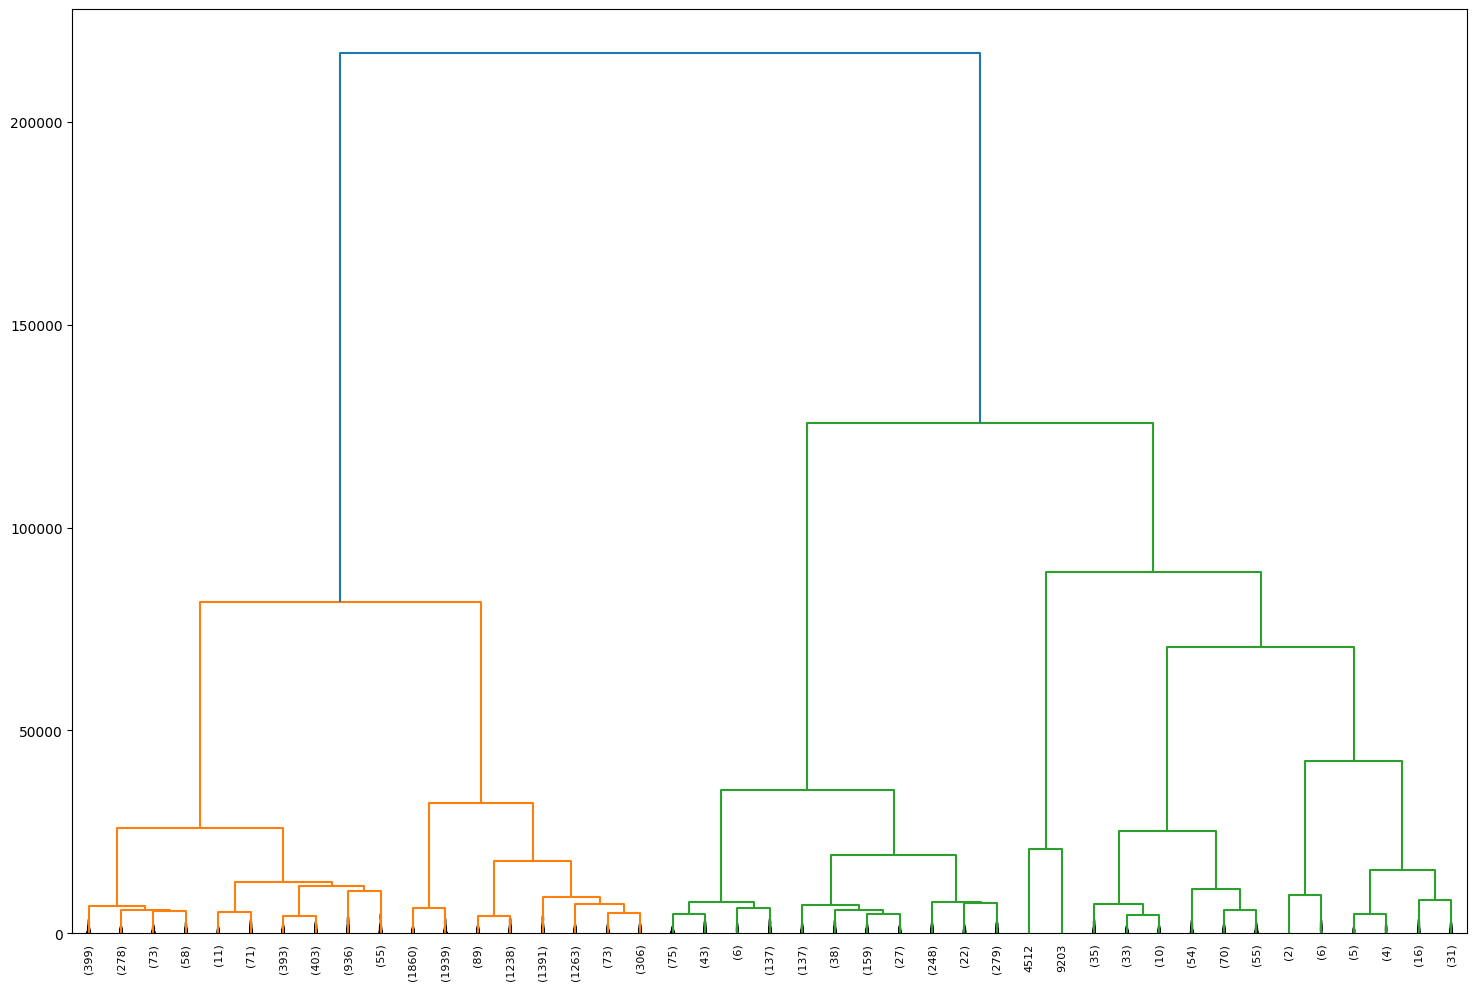

In [513]:
fig, ax = plt.subplots(figsize=(18, 12))
dend = hierarchy.dendrogram(
    hierarchy.linkage(online_shop, method="ward"),
    truncate_mode="lastp",
    p=43,
    show_contracted=True)

## 4.2 K-means clustering

- ### Elbow plot

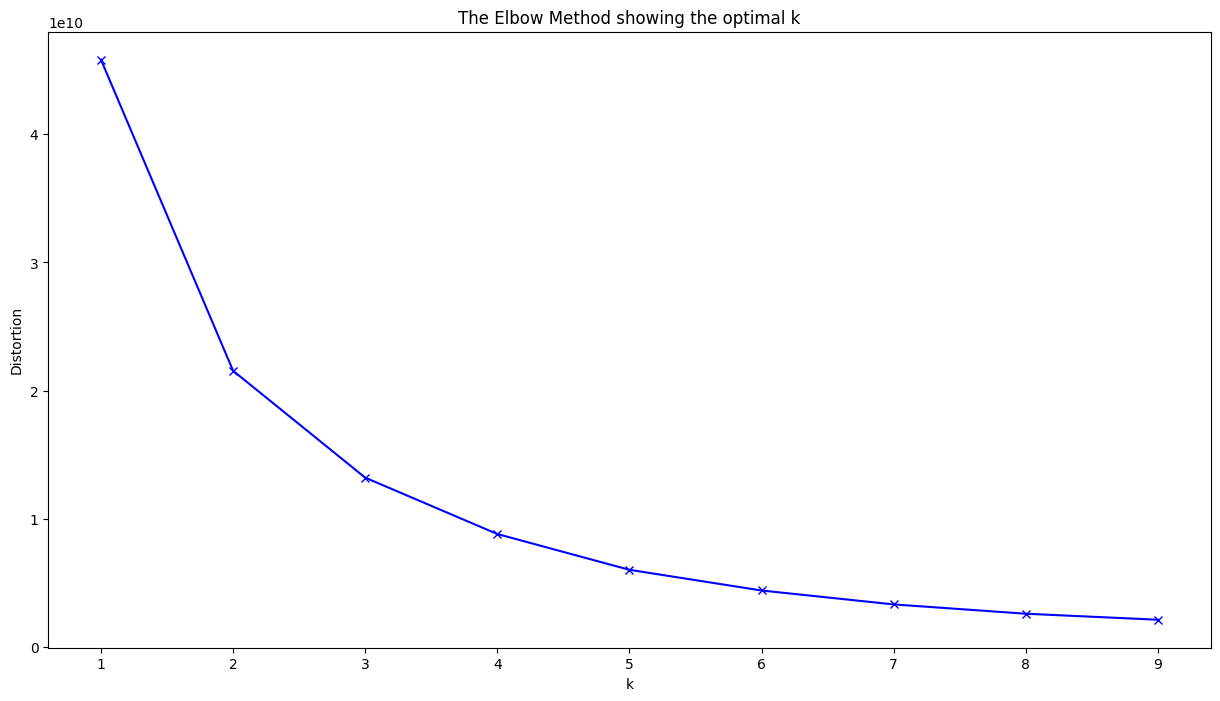

In [514]:
distortions = []
K = range(1,10) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(online_shop)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- ### Silhouette plot

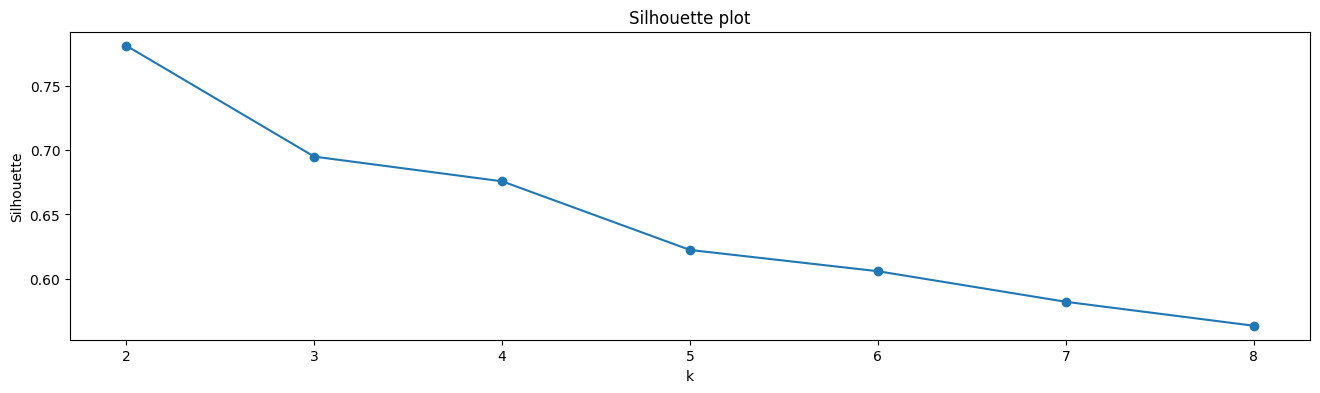

In [517]:
Scores = []
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(online_shop)
    Scores.append(silhouette_score(online_shop,estimator.labels_,metric='euclidean'))
X = range(2,9)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.plot(X,Scores,'o-')
plt.title('Silhouette plot')
plt.show()

# 5. Post-Clustering Exploratory Data Analysis

# 6. Clustering Output vs. Actual Labels

In [520]:
labels = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Project_2/src/Project2_Data_Labels.csv")
labels.shape

(12330, 1)

# 7. SVM Modeling

# 8. Select Models

# 9. Clustering + SVM Output vs. Actual Labels

# 10. Conclusion